# Importing Libraries

In [1]:
!pip install keras
# ML model / lib

In [5]:
!pip install Keras-Preprocessing
# some features of keras are retarded thus keras preprocessing is used

In [2]:
!pip install numpy
# to handle numbers

In [4]:
!pip install pandas
# to read csv and for table and dataframe management

In [5]:
# to plot graphs
!pip install seaborn

In [6]:
!pip install tensorflow
# ML lib

# Start

In [6]:
import matplotlib.pyplot as plt # images plot
import numpy as np # number array
import pandas as pd # tables
import seaborn as sns # graphs
import os # folder in Local drive / PC 

# Importing Deep Learning Libraries - CNN 

#from keras.preprocessing.image import load_img, img_to_array
from keras_preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [9]:
picture_size = 48
folder_path = "C:/Users/Rajiv Upadhyaya/OneDrive/Documents/MINI Project/images/images1/" 
#"../input/face-expression-recognition-dataset/images/"

In [3]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 21, 1):
    plt.subplot(5,5,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

NameError: name 'plt' is not defined

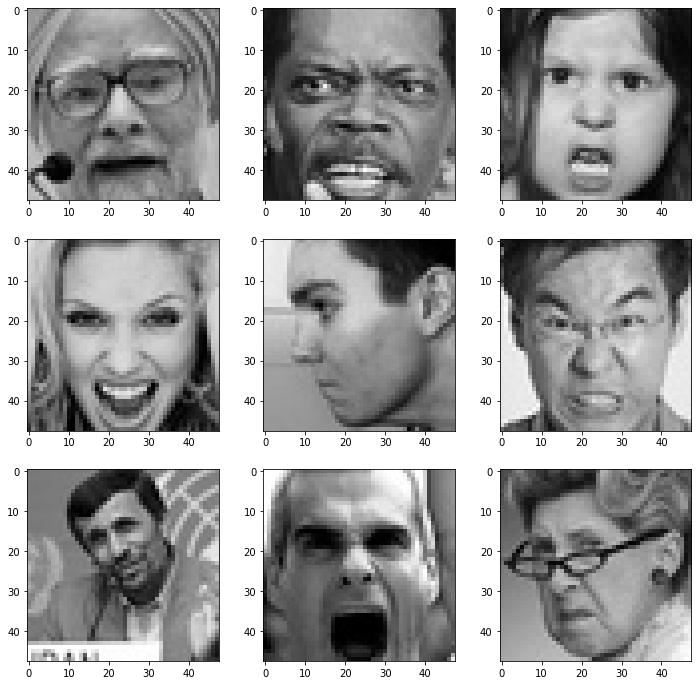

In [8]:
expression = 'angry'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [4]:
expression = 'fear'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

NameError: name 'plt' is not defined

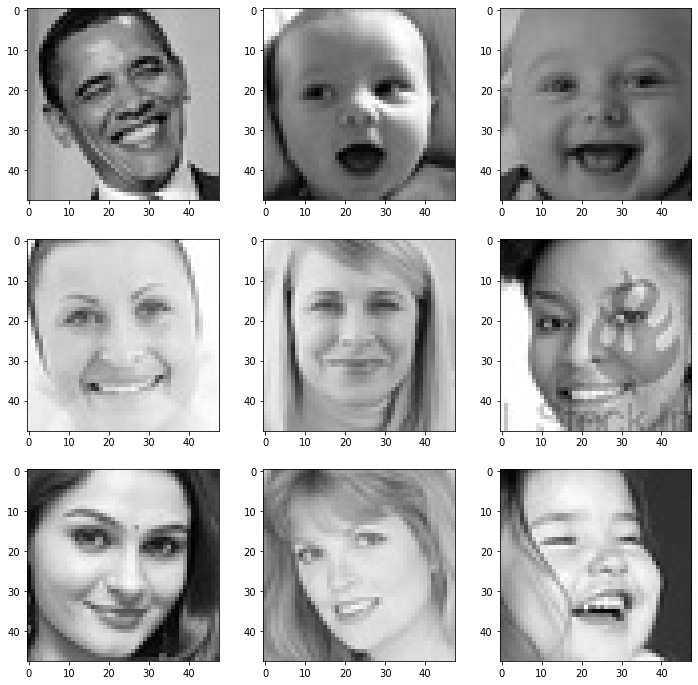

In [12]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

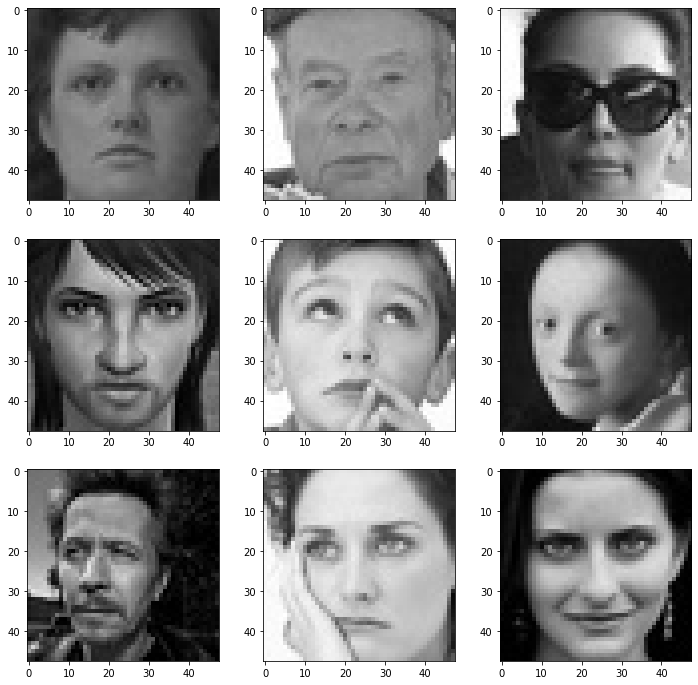

In [13]:
expression = 'neutral'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

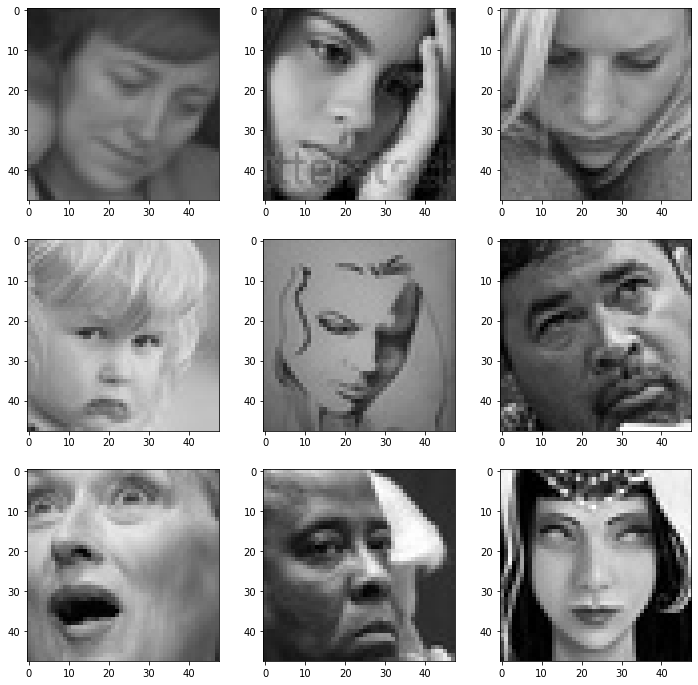

In [14]:
expression = 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

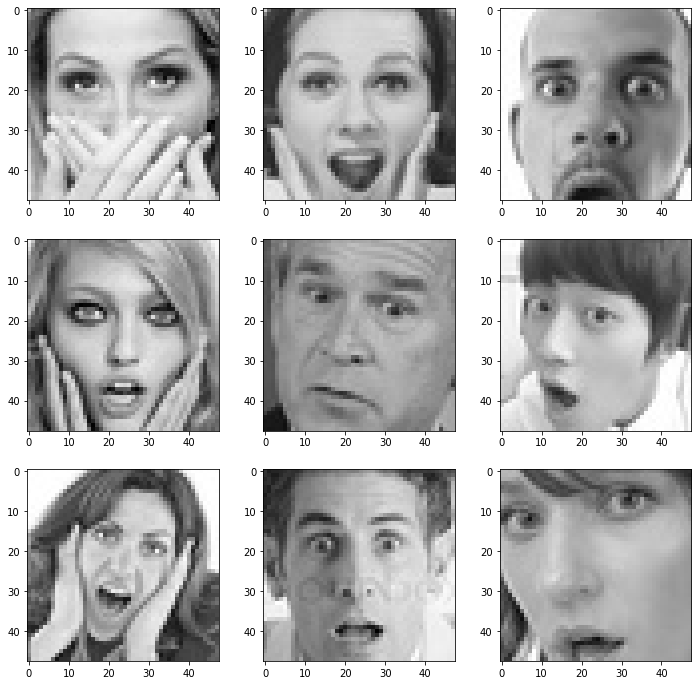

In [15]:
expression = 'surprise'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

In [16]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Training & testing ratio is 80:20

# Model Building

In [17]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

C:\Users\Rajiv Upadhyaya\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

#testing model against training data

history = model.fit(train_set, epochs=10, validation_data=test_set)


Epoch 1/10
226/226 [==============================] - 506s 2s/step - loss: 1.8013 - accuracy: 0.3020 - val_loss: 1.8668 - val_accuracy: 0.3631
Epoch 2/10
226/226 [==============================] - 499s 2s/step - loss: 1.4485 - accuracy: 0.4421 - val_loss: 1.4089 - val_accuracy: 0.4747
Epoch 3/10
226/226 [==============================] - 499s 2s/step - loss: 1.2850 - accuracy: 0.5088 - val_loss: 1.3322 - val_accuracy: 0.5096
Epoch 4/10
226/226 [==============================] - 478s 2s/step - loss: 1.1930 - accuracy: 0.5435 - val_loss: 1.2021 - val_accuracy: 0.5415
Epoch 5/10
226/226 [==============================] - 466s 2s/step - loss: 1.1255 - accuracy: 0.5728 - val_loss: 1.4602 - val_accuracy: 0.4135
Epoch 6/10
226/226 [==============================] - 467s 2s/step - loss: 1.0690 - accuracy: 0.5944 - val_loss: 1.1155 - val_accuracy: 0.5788
Epoch 7/10
226/226 [==============================] - 473s 2s/step - loss: 1.0305 - accuracy: 0.6111 - val_loss: 1.0832 - val_accuracy: 0.5989

In [30]:
from IPython.display import FileLink

# assume you have already trained your model and stored it in a variable called 'model'
model.save('my_model.h5')

# create a download link for the file
FileLink('my_model.h5')

C:\Users\Rajiv Upadhyaya\Emotion_Detection_CNN\my_model.h5